Exploring the $\chi^2$ distribution
===

Start with some model to generate random data.  <br> 
We'll use $0.2+\frac{sin(x)}{x+1}$ over the range $0\leq x<15$ <br>
Generate $N$ random numbers according to this distribution and make a histogram of the results using 30 bins. 

An easy way to generate random numbers according to an arbitrary distribution is to use rejection sampling (here's a great [decription  of the technique](https://matthewfeickert.github.io/Statistics-Notes/notebooks/simulation/Rejection-Sampling-MC.html) )

1) Make a histogram of your random distribution.  Verify that the the numbers you generated agree with the shape of the function.  Generate at least 10000 points and plot your data in a histogram with errorbars.  You can use numpy+matplotlib+etc, PyROOT, or a mix.  Think about how to appropriately normalize your function, then overlay it with the data.  The normalization depends on the number of bins, the bin range and the number of points thrown.  You may find it easier to first nromalize the area of your function to 1.0, thus turning it into a proper PDF.  

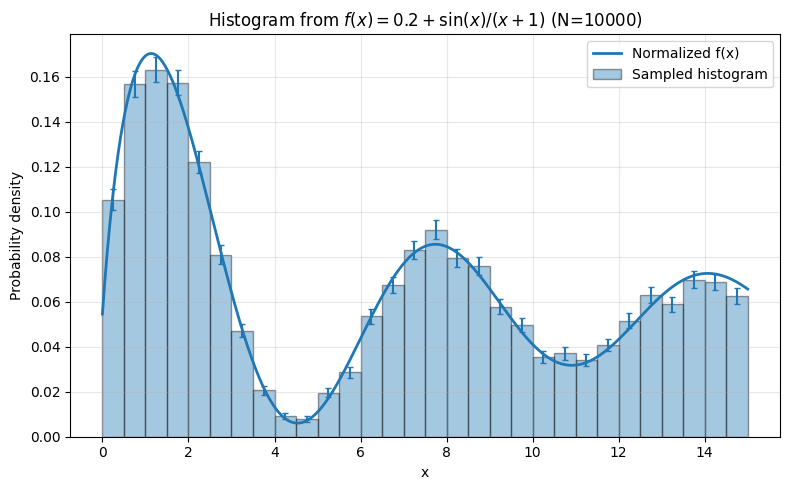

In [13]:
# Fixed and working version of your script (with comments on each bug we corrected)
import numpy as np
import matplotlib.pyplot as plt

# --- model ---
def model(x):
    return 0.2 + np.sin(x) / (x + 1)

rng = np.random.default_rng(42)
xmin, xmax = 0.0, 15.0
xx = np.linspace(xmin, xmax, 2000)
yy = model(xx)

pdf = yy / np.trapezoid(yy, xx)  

N = 10_000
fmax = pdf.max()
samples = []

while len(samples) < N:
    x_try = rng.uniform(xmin, xmax, N)
    y_try = rng.uniform(0.0, fmax, N)
    mask = y_try < np.interp(x_try, xx, pdf)
    samples.extend(x_try[mask])

samples = np.array(samples[:N])

bins = 30
counts, edges = np.histogram(samples, bins=bins, range=(xmin, xmax))

centers = 0.5 * (edges[:-1] + edges[1:])
bin_width = edges[1] - edges[0]

M = samples.size 
density = counts / (M * bin_width)

sigma_density = np.sqrt(np.maximum(counts, 1)) / (M * bin_width)

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(centers, density, width=bin_width, alpha=0.4, edgecolor="black", label="Sampled histogram")
ax.errorbar(centers, density, yerr=sigma_density, fmt="none", capsize=2)
ax.plot(xx, pdf, lw=2, label="Normalized f(x)")
ax.set_xlabel("x")
ax.set_ylabel("Probability density")
ax.set_title(r"Histogram from $f(x)=0.2+\sin(x)/(x+1)$ (N=10000)")
ax.legend()
ax.grid(True, alpha=0.3)
fig.tight_layout()

2) Repeat the above experiment at least 1000 times.  For each experiment calculate the $\chi^2$ of your data with respect to your (properly normalized) model.  Plot (histogram) the $\chi^2$ distribution and compare it to the functional form of the $\chi^2(ndof=30)$ distribution.  You can find the form of the $\chi^2(ndof)$ PDF function in many places and implement it using the Gamma function or use a premade function, eg:
* [wikipedia](https://en.wikipedia.org/wiki/Chi-squared_distribution)
* [scipy.stats.chi2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2)

<>:47: SyntaxWarning: invalid escape sequence '\c'
<>:47: SyntaxWarning: invalid escape sequence '\c'
/var/folders/9d/vpwkzvld55j_795mqv39ljm00000gn/T/ipykernel_33913/3506514054.py:47: SyntaxWarning: invalid escape sequence '\c'
  ax.hist(chi2vals, bins=60, density=True, alpha=0.45, edgecolor="black", label="Simulated $\chi^2$")


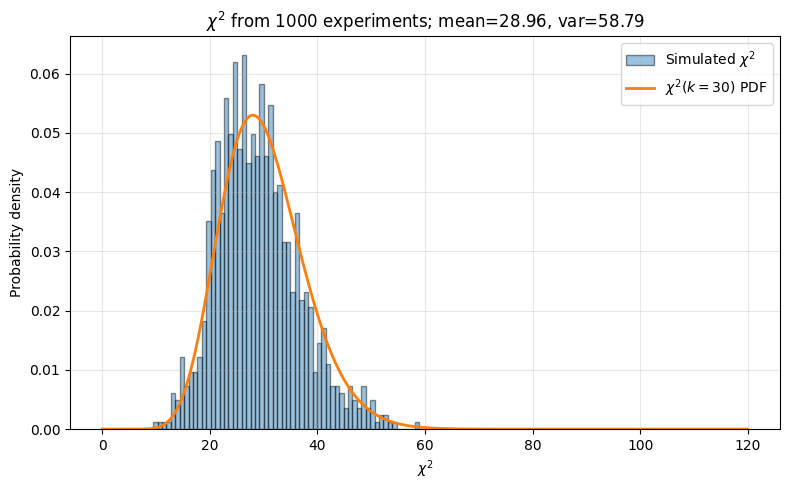

In [ ]:
import scipy.stats as stats

rng = np.random.default_rng(42)


def experiment():
    def model(x):
        return 0.2 + np.sin(x) / (x + 1)

    xmin, xmax = 0.0, 15.0
    xx = np.linspace(xmin, xmax, 2000)
    yy = model(xx)

    # normalize
    pdf = yy / np.trapezoid(yy, xx)

    N = 10_000
    fmax = pdf.max()
    samples = []
    while len(samples) < N:
        x_try = rng.uniform(xmin, xmax, N)
        y_try = rng.uniform(0.0, fmax, N)
        mask = y_try < np.interp(x_try, xx, pdf)
        samples.extend(x_try[mask])
    samples = np.array(samples[:N])

    # histogram bins
    bins = 30
    edges = np.linspace(xmin, xmax, bins + 1)
    counts, _ = np.histogram(samples, bins=edges)

    cdf = np.zeros_like(xx)
    cdf[1:] = np.cumsum(0.5*(pdf[1:] + pdf[:-1]) * np.diff(xx))
    cdf /= cdf[-1]
    cdf_edges = np.interp(edges, xx, cdf)
    p = np.diff(cdf_edges)  # probability per bin
    mu = N * p              # expected counts per bin

    chi2 = np.sum(((counts - mu)**2/mu))
    return chi2

chi2vals = [experiment() for _ in range(1000)]

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(chi2vals, bins=60, density=True, alpha=0.45, edgecolor="black", label="Simulated $\chi^2$")

k = 30
x_pdf = np.linspace(0, 4*k, 1000)
ax.plot(x_pdf, stats.chi2.pdf(x_pdf, k), lw=2, label=f"$\\chi^2(k={k})$ PDF")

ax.set_xlabel(r"$\chi^2$")
ax.set_ylabel("Probability density")
ax.set_title(rf"$\chi^2$ from 1000 experiments; mean={np.mean(chi2vals):.2f}, var={np.var(chi2vals):.2f}")
ax.grid(True, alpha=0.3)
ax.legend()
fig.tight_layout()

**Only required for Phys5630**

3) Modify your code above to perform the following study. <br>
Repeat (2) for nbins = $ndof = 30, 50, 75, 100$ and calculate the reduced $\chi^2$, eg $\chi^2/ndof$ for each experiment.  Plot the mean value of the reduced $\chi^2$ with errorbars versus $ndof$.  Make a table comparing your calculations to the expected results.

In [ ]:
import scipy.stats as stats

rng = np.random.default_rng(42)

def experiment(nb):
    def model(x):
        return 0.2 + np.sin(x) / (x + 1)

    xmin, xmax = 0.0, 15.0
    xx = np.linspace(xmin, xmax, 2000)
    yy = model(xx)

    # normalize
    pdf = yy / np.trapezoid(yy, xx)

    N = 10_000
    fmax = pdf.max()
    samples = []
    while len(samples) < N:
        x_try = rng.uniform(xmin, xmax, N)
        y_try = rng.uniform(0.0, fmax, N)
        mask = y_try < np.interp(x_try, xx, pdf)
        samples.extend(x_try[mask])
    samples = np.array(samples[:N])

    # histogram bins
    bins = nb
    edges = np.linspace(xmin, xmax, bins + 1)
    counts, _ = np.histogram(samples, bins=edges)

    cdf = np.zeros_like(xx)
    cdf[1:] = np.cumsum(0.5*(pdf[1:] + pdf[:-1]) * np.diff(xx))
    cdf /= cdf[-1]
    cdf_edges = np.interp(edges, xx, cdf)
    p = np.diff(cdf_edges)  # probability per bin
    mu = N * p              # expected counts per bin

    chi2 = np.sum(((counts - mu)**2/mu))
    return chi2

# run many experiments
chi2vals = [np.mean([experiment(n) for _ in range(200)])/n for n in np.arange(30, 200, 10)]


print(f"{'ndof':>6} | {'mean chi^2/nu':>10} | {'expected':>10} | {'err':>8}\n" + "\n".join(f"{n:6d} | {v:10.3f} | {1.000:10.3f} | {np.sqrt(2/n):8.3f}" for n, v in zip(np.arange(30, 200, 10), chi2vals)))


  ndof | mean chi^2/nu |   expected |      err
    30 |      0.959 |      1.000 |    0.258
    40 |      0.974 |      1.000 |    0.224
    50 |      0.993 |      1.000 |    0.200
    60 |      0.981 |      1.000 |    0.183
    70 |      0.979 |      1.000 |    0.169
    80 |      0.997 |      1.000 |    0.158
    90 |      0.978 |      1.000 |    0.149
   100 |      0.990 |      1.000 |    0.141
   110 |      0.997 |      1.000 |    0.135
   120 |      0.993 |      1.000 |    0.129
   130 |      0.995 |      1.000 |    0.124
   140 |      1.004 |      1.000 |    0.120
   150 |      0.984 |      1.000 |    0.115
   160 |      1.000 |      1.000 |    0.112
   170 |      0.985 |      1.000 |    0.108
   180 |      0.983 |      1.000 |    0.105
   190 |      0.993 |      1.000 |    0.103
